In [1]:
!python --version
# !pip install matplotlib

Python 3.11.6


In [2]:
from openai import OpenAI
import os
import matplotlib.pyplot as plt
import numpy as np
client = OpenAI()

In [ ]:
res = client.moderations.create(input="I want to kill them.", model="text-moderation-latest")
res

#### A function including the visulization

In [3]:
def getMdr(input):
    res = client.moderations.create(input=input, model="text-moderation-latest")

    for input_res in res.results:
        print(f"Flagged: {input_res.flagged}")
        for key, value in input_res.categories.model_dump().items():
            if value is True:
                print(f"{key} is flagged")
        labels = np.array(list(input_res.category_scores.model_dump().keys()))
        stats=np.array(list(input_res.category_scores.model_dump().values()))
        num_vars = len(labels)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        stats=np.concatenate((stats,[stats[0]]))
        angles+=angles[:1]

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, stats, color='red', alpha=0.25)

        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        for label, angle in zip(ax.get_xticklabels(), angles):
            if angle in (0, np.pi):
                label.set_horizontalalignment('center')
            elif 0 < angle < np.pi:
                label.set_horizontalalignment('right')
            else:
                label.set_horizontalalignment('left')
        plt.show()

Flagged: True
sexual is flagged


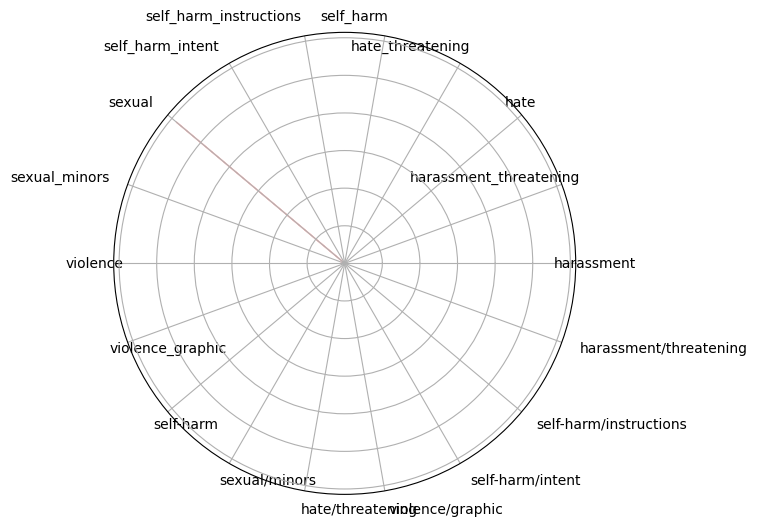

In [4]:
getMdr(""" Lyrics of Neighbors Know My Name by Trey Songz
Soon as we get started makin' love goin' hard
I hear a knock-knock, knocking on the wall
And as soon as I go deep getting it in then again
There's a knock-knock, knocking on the wall
Girl your legs keep shakin' and I swear
We breakin' our new headboard, headboard
And the love we make, it feels so good, girl, you know I'm proud
Lookin' in your lovely face, scream my name, you do it so loud
I bet the neighbors know my name
Way you screamin', scratchin', yellin'
Bet the neighbors know my name
And they be stressin' while we sexin'
Bet the neighbors know my name
My name, my name
I bet the neighbors know my name
My, my, my
Take this pillow right here (grab this)
And I know you're so excited, if you bite it they won't hear
And you know just what we capable of, when we makin' love
So the music gon' be loud, you gon' scream and shout
Girl, your body's a problem, they call me the problem solver
Let the phone sit on the charger, it could ring all night
They can call, they can knock, and be upset, but I bet
I bet the neighbors know my name
Way you screamin', scratchin', yellin'
Bet the neighbors know my name
They be stressin' while we sexin'
Bet the neighbors know my name
My name my name, name
I bet the neighbors know my name
My, my, my
While I be bangin' on your body, they be bangin' on our wall
While they dreamin', you be screamin' now they bangin' on our door
Sometimes she call me Trey, sometimes she say Tremaine
When it's all said and done bet the neighbors know my name
Sometimes she call me Trigga 'cause I make her body bust
They might think my name is "oh shit", I make her cuss
I bet the neighbors know my name
Way you screamin', scratchin', yellin'
Bet the neighbors know my name
And They be stressin' while we sexin'
I bet the neighbors know my name
My name, my name
I bet the neighbors know my name
Bet the neighbors know my name
I bet the neighbors know my name
Way you screamin', scratchin', yellin'
Bet the neighbors know my name
And they be stressin' while we sexin'
Bet the neighbors know my name
My name, my name
I bet the neighbors know my name
My, my, my
The way you scream my name (the way you scream my name)
Whoa, girl the love we made (girl, the love we make)
Gon' keep on bangin' on the wall, but nothing's gonna change
I bet the neighbors know my name
""")

Flagged: False


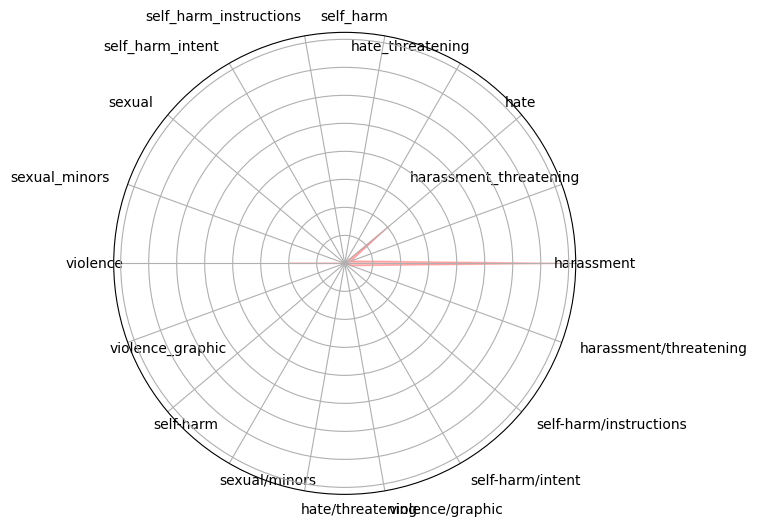

In [5]:
getMdr('''
What's Gucci, my nigga? What's Louis, my killer?
What's drugs, my dealer? What's that jacket, Margiela?
Doctors say I'm the illest
'Cause I'm suffering from realness
Got my niggas in Paris and they going gorillas, huh?
''')